In [1]:
import pandas as pd
import numpy as np
import pprint as pp
from collections import OrderedDict
import requests
import json
import datetime
import spacy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns

# File to Load (Remember to Change These)
file_to_load = "db/machineLearntCsvData.csv"
schoolData = pd.read_csv(file_to_load, encoding="utf-8-sig")
schoolData.reset_index()
schoolData.fillna(-1)
#schoolData.drop(schoolData.columns[0], axis=1)
schoolData.head()
schoolData = schoolData.drop(schoolData.columns[0], axis=1)
schoolData = schoolData.drop(schoolData.columns[5], axis=1)

schoolData.drop(0, inplace=True)

schoolData.head()
y = schoolData.Killed
X = schoolData.drop('Killed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123)
 


# Examine the overall statistics in the training set
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats




,count,mean,std,min,25%,50%,75%,max
Wounded,686.0,1.086006,3.475026,0.0,0.0,1.0,1.0,74.0
Gender of Victims (M/F/Both),686.0,0.163265,0.806646,-1.0,0.0,0.0,0.0,2.0
Targeted Specific Victim(s),686.0,0.524781,0.682502,-2.0,0.0,1.0,1.0,1.0
Suicide (or attempted suicide) by Shooter (Y/N),686.0,0.132653,0.372266,-1.0,0.0,0.0,0.0,1.0
Pre-planned school attack,686.0,0.010204,0.288284,-1.0,0.0,0.0,0.0,1.0
School Type,686.0,1.508746,0.834867,-1.0,1.0,2.0,2.0,3.0
Number of Shooters,686.0,0.989796,0.475577,0.0,1.0,1.0,1.0,6.0


Coefficients: 
 [ 0.03592873  0.32617039  0.04892444  0.77921619  1.0125588  -0.08925724
 -0.16886154]
Variance score: 0.03


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


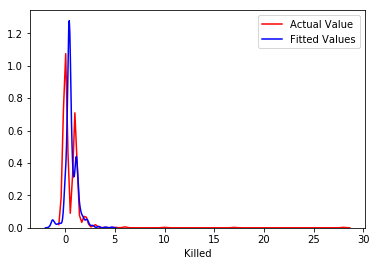

In [2]:
# Create linear regression object
regr = linear_model.Ridge(alpha=.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

Coefficients: 
 [ 0.05737835  0.27641774  0.          0.17659941  0.         -0.
 -0.        ]
Variance score: 0.13


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


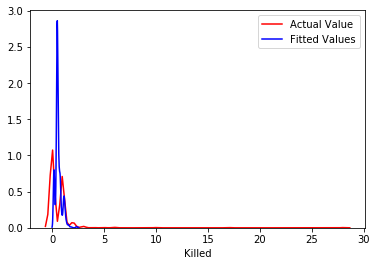

In [3]:
# LASSO
regr = linear_model.Lasso(alpha=0.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

Coefficients: 
 [0. 0. 0. 0. 0. 0. 0.]
Variance score: -0.01


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


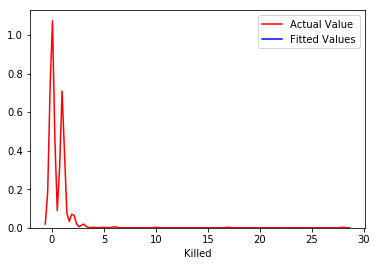

In [6]:
# LARS Lasso

regr = linear_model.LassoLars(alpha=.5)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)



Coefficients: 
 [ 0.03880399  0.33145679  0.05010681  0.72790974  0.88290999 -0.08666703
 -0.15722247]
Variance score: 0.07


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


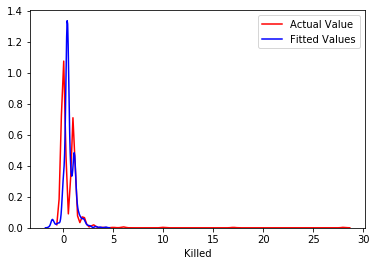

In [7]:
# Bayesian Regression
regr = linear_model.BayesianRidge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)